# Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

About the Dataset
The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch. +25,000 matches +10,000 players 11 European Countries with their lead championship Seasons 2008 to 2016 Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates Team line up with squad formation (X, Y coordinates) Betting odds from up to 10 providers Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

In [216]:
#import the supported library 
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [217]:
# Create your connection.
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [218]:
# show the top record
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [219]:
df.shape

(183978, 42)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [221]:
# remove na fields
df = df.dropna()

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

# Feature Selection
Given that we have about 35-40 different features to play around with, we can attempt to run some feature selection algorithms to reduce the size of our featureset

In [223]:
from sklearn.preprocessing import scale

In [224]:
df_new = df.copy()

In [225]:
df_new = df_new.select_dtypes(["int64","float64"])

In [226]:
df_new.shape

(180354, 38)

In [227]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 38 columns):
id                    180354 non-null int64
player_fifa_api_id    180354 non-null int64
player_api_id         180354 non-null int64
overall_rating        180354 non-null float64
potential             180354 non-null float64
crossing              180354 non-null float64
finishing             180354 non-null float64
heading_accuracy      180354 non-null float64
short_passing         180354 non-null float64
volleys               180354 non-null float64
dribbling             180354 non-null float64
curve                 180354 non-null float64
free_kick_accuracy    180354 non-null float64
long_passing          180354 non-null float64
ball_control          180354 non-null float64
acceleration          180354 non-null float64
sprint_speed          180354 non-null float64
agility               180354 non-null float64
reactions             180354 non-null float64
balance              

In [228]:
X = df_new.drop('overall_rating',axis=1).values
y = df_new['overall_rating'].values.ravel()
from sklearn.preprocessing import scale
X = scale(X)

In [229]:
df_1 = df_new.drop('overall_rating',axis=1)

# Feature Selection using RFE Scikit Library

In [230]:
liner_reg_model =LinearRegression()
from sklearn.feature_selection import RFE

In [231]:
ref_Value =RFE(liner_reg_model,n_features_to_select = 15)

ref_Value.fit(X,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [232]:
ref_Value.n_features_

15

In [233]:
features = []
for feat in df_1.columns[ref_Value.support_]:
    print(feat)
    features.append(feat)

player_fifa_api_id
player_api_id
potential
heading_accuracy
short_passing
ball_control
acceleration
reactions
strength
marking
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [234]:
df_optimun =df_new[features]

In [235]:
df_optimun.shape

(180354, 15)

# Using Statsmodels for analysing the impact of attribute potential on the player rating

In [236]:
import statsmodels.formula.api as sm
model1 = sm.OLS(df_new['overall_rating'],df_new['potential'])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.062e+07
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:51   Log-Likelihood:            -5.3063e+05
No. Observations:              180354   AIC:                         1.061e+06
Df Residuals:                  180353   BIC:                         1.061e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
potential      0.9331      0.000   6373.716      0.0

# Using Statsmodels for analysing the impact of all attribute on the player rating

In [237]:
import statsmodels.formula.api as sm
model1 = sm.OLS(df_new['overall_rating'],df_new[features])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.035e+06
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:59:51   Log-Likelihood:            -4.3282e+05
No. Observations:              180354   AIC:                         8.657e+05
Df Residuals:                  180339   BIC:                         8.658e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
player_fifa_api_id -8.998e-06   1.44

# Explanation of the OLS Regression Results :
Adjusted R-squared indicates that 99.9% of player ratings can be explained by our predictor variable.
The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant.
In our model, a one unit increase in potential increases the rating by 0.4525.
The standard error measures the accuracy of potential's coefficient by estimating the variation of the coefficient if the same test were run on a different sample of our population.
Our standard error,0.001, is low and therefore appears accurate.
The p-value means the probability of an 0.4525 increasing in player rating due to a one unit increase in potential is 0% , assuming there is no relationship between the two variables.
A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.
The confidence interval is a range within which our coefficient is likely to fall. We can be 95% confident that potentials's coefficient will be within our confidence interval, [0.450,0.455].

# Apply Imputer as Preprocessing

In [238]:
from sklearn.preprocessing import Imputer
Imput = Imputer()

# Split the train data and test data

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train ,X_test ,y_train,y_test =train_test_split (X,y)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",y_train.shape)
print("Y_test.shape : ",y_test.shape)

X_train Shape :  (135265, 37)
X_test Shape :  (45089, 37)
Y_train Shape :  (135265,)
Y_test.shape :  (45089,)


In [241]:
y_train =y_train.reshape(-1,1)
y_test =y_test.reshape(-1,1)

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
std = StandardScaler()

In [244]:
std.fit(X_train,y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [245]:
std.mean_

array([-1.42831780e-03,  7.47843737e-04,  1.31963121e-03,  1.01677290e-03,
        2.62193652e-03,  5.19115296e-03,  2.72001629e-03,  1.74539845e-03,
        4.72569844e-03,  3.25764943e-03,  2.30939057e-03,  3.31937733e-03,
        5.59926505e-04,  2.71689674e-03,  1.64621825e-03,  1.29479040e-03,
        2.54986099e-03,  9.13967115e-04,  1.18366052e-03,  3.47996478e-03,
        7.26009818e-04,  9.17222129e-04, -5.26299914e-05,  3.93373356e-03,
       -1.43264395e-04, -1.78655610e-03,  3.55497630e-03,  3.18414931e-03,
        4.77992204e-03, -2.83541673e-03, -2.22877219e-03, -2.52263807e-03,
       -2.38412008e-03, -2.53796875e-03, -1.14456726e-03, -2.93436479e-03,
       -2.25420489e-03])

In [246]:
std.scale_

array([0.99999348, 0.99993101, 1.00112413, 1.00098563, 0.99861602,
       0.99992333, 0.99873317, 0.99778604, 0.99950071, 0.99775444,
       0.99926635, 0.99910642, 0.99946352, 0.99705901, 0.99824633,
       0.99823992, 0.99811412, 1.00034808, 0.99973982, 0.99940654,
       0.99913633, 0.99808988, 1.00088978, 0.99879683, 0.99910606,
       1.00040016, 0.99855614, 0.99865318, 1.0000007 , 0.99963306,
       0.99987714, 0.9999523 , 0.99599148, 0.99574635, 0.99898238,
       0.99584084, 0.99585456])

In [247]:
std.var_

array([0.99998697, 0.99986203, 1.00224952, 1.00197223, 0.99723396,
       0.99984667, 0.99746794, 0.99557698, 0.99900167, 0.99551392,
       0.99853323, 0.99821365, 0.99892733, 0.99412667, 0.99649574,
       0.99648293, 0.9962318 , 1.00069628, 0.99947972, 0.99881343,
       0.9982734 , 0.9961834 , 1.00178036, 0.9975951 , 0.99821293,
       1.00080047, 0.99711436, 0.99730817, 1.00000141, 0.99926626,
       0.9997543 , 0.9999046 , 0.99199904, 0.9915108 , 0.99796579,
       0.99169897, 0.99172631])

In [248]:
X_train_std = std.transform(X_train)

In [249]:
X_test_std =std.transform(X_test)

# Apply Imputer for the training set

In [250]:
Imput.fit(X_train_std)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [251]:
Imput.statistics_

array([-7.35661773e-18, -2.10886152e-17, -1.64616531e-16,  7.52438440e-17,
        4.26877121e-16, -7.62994854e-16, -7.15350022e-16, -1.19394056e-15,
       -1.68698251e-16, -1.68191914e-15, -1.66828523e-16,  1.32491019e-15,
        5.43247191e-17, -6.26895784e-16,  3.71196069e-17, -1.10320539e-17,
        1.65047890e-16,  2.57807797e-15, -5.16650757e-16,  9.82672340e-17,
       -2.12226479e-16,  1.81407972e-16,  1.84567140e-16,  4.77240363e-16,
        3.22524036e-18, -7.41538531e-17, -1.56344542e-15,  1.03019077e-15,
        7.06763882e-16, -1.31775466e-15, -6.32436845e-16,  4.84658539e-16,
       -9.27906454e-16,  3.48898040e-16,  1.85337192e-15, -1.42979514e-15,
       -1.69382409e-15])

In [252]:
X_train_std_imput =Imput.transform(X_train_std)

In [253]:
X_train_std_imput

array([[ 1.2546474 ,  0.53382478, -0.20480508, ...,  1.68058681,
         2.93879333,  2.84638134],
       [ 0.28241355,  0.48198605,  0.38690173, ..., -0.68657711,
        -0.06047814, -0.36733152],
       [ 0.04473253,  0.39103161,  0.23784621, ..., -0.44986072,
        -0.24793261, -0.0751758 ],
       ...,
       [-0.53354489,  0.1625474 , -0.64000105, ...,  2.24870615,
         0.43940044,  0.39227334],
       [ 0.4712173 ,  0.8442513 ,  1.12248092, ..., -0.497204  ,
        -0.12296296, -0.25046923],
       [-0.85549447,  0.30062623, -0.78775716, ..., -0.35517416,
        -0.31041743, -0.36733152]])

In [254]:
X_test_std_imput =Imput.transform(X_test_std)

# Apply Liner Regression model 

In [255]:
lm =LinearRegression()

In [256]:
lm.fit(X_train_std_imput,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [257]:
Y_pred  = lm.predict(X_test_std_imput)

In [258]:
lm.score(X_test_std_imput,y_test)

0.8576574583705265

In [259]:
print("The variance score of the LinearRegression model is  : ",lm.score(X_test_std_imput,y_test))

The variance score of the LinearRegression model is  :  0.8576574583705265


The variance score of the LinearRegression model is  :  0.8593275836597537
Since variance score is near about 1 it seems to be a perfect prediction

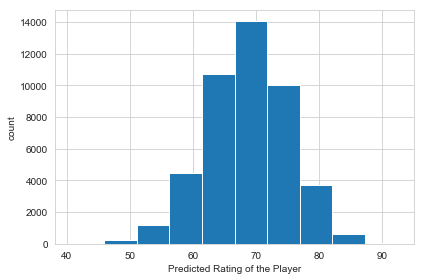

In [264]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(Y_pred)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

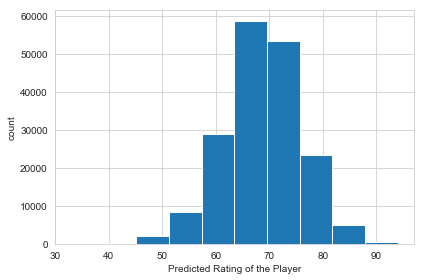

In [265]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(y)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

Text(0.5,1,'Actual vs Predicted Rating for LinearRegression Model')

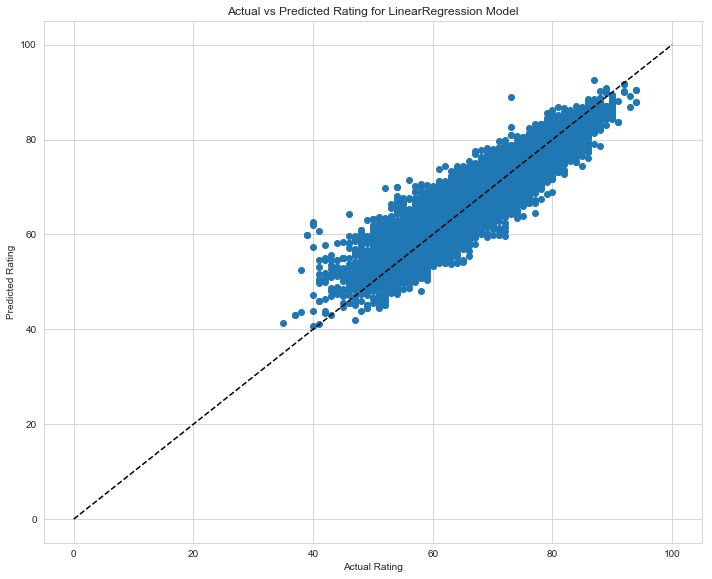

In [266]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(y_test, Y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for LinearRegression Model")

# Evaluate Linear Regression Accuracy using Root Mean Square Error

In [267]:
from sklearn.metrics import mean_squared_error

print("Error Rate of the Regression Model : ",sqrt(mean_squared_error(Y_pred,y_test)))

Error Rate of the Regression Model :  2.642875051244677


# Evaluate Desicion Tree Regression 

In [268]:
from sklearn.tree import DecisionTreeRegressor

In [269]:
decision_tree = DecisionTreeRegressor(max_depth=20)

In [270]:
decision_tree.fit(X_train_std_imput,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [271]:
Y_tree_predct =decision_tree.predict(X_test_std_imput)

In [272]:
decision_tree.score(X_test_std_imput,y_test)

0.9577230888726529

In [273]:
print("The variance score of the DecisionTreeRegressor model is  : ",decision_tree.score(X_test_std_imput,y_test))

The variance score of the DecisionTreeRegressor model is  :  0.9577230888726529


The variance score of the LinearRegression model is : 0.958957747607493 Since variance score is near about 1 it seems to be a perfect prediction

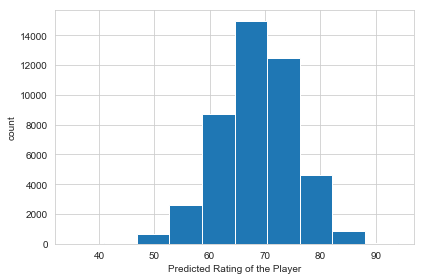

In [274]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(Y_tree_predct)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

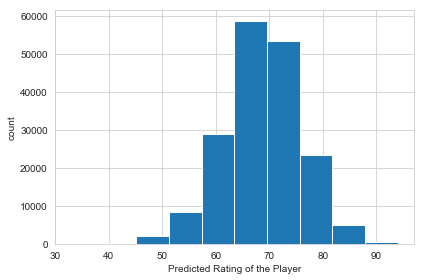

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(y)
plt.xlabel('Predicted Rating of the Player')
plt.ylabel('count')
plt.tight_layout()

# Evaluate Linear Regression Accuracy using Root Mean Square Error For DecisionTreeRegressor mode

In [276]:
from sklearn.metrics import mean_squared_error

print("Error Rate of the Regression Model : ",sqrt(mean_squared_error(Y_tree_predct,y_test)))

Error Rate of the Regression Model :  1.4403263223705276


the DecisionTreeRegressor Model performs better than the LinearRegression Model as eveident from the error rate

# Obtaining predictions by cross-validation for the Regression Models

In [277]:
df_optm = df_new.copy()
df_optm['rating'] = y
df_optm.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


In [278]:
from sklearn.model_selection import cross_val_predict
X = df_optm.drop('rating',axis=1)
Y = df_optm['rating']
predicted = cross_val_predict(decision_tree, X, Y, cv=10)


In [279]:
from sklearn.metrics import accuracy_score
print( "Accuracy Score of the DecisionTreeRegressor Model is  : " ,accuracy_score(Y.astype(int), predicted) )

Accuracy Score of the DecisionTreeRegressor Model is  :  0.9998558390720472


# Calculate Error using K-Fold Cross validation

In [280]:
from sklearn.model_selection import KFold
from sklearn.base import clone

In [281]:
kfold = KFold(n_splits=20,shuffle=True,random_state=0)

In [282]:
from sklearn.metrics import mean_absolute_error
mean_abs_error = []
accuracy_score = []
for train,test in kfold.split(X):
    x = X.iloc[train]
    y = Y.iloc[train]
    lm.fit(x,y)
    Y_test = Y.iloc[test]
    Y_pred = lm.predict(X.iloc[test])
    mean_abs_error.append(mean_absolute_error(Y_test,Y_pred))

In [283]:
print('10 Fold Cross Validation Error : {} accuracy score : {}  for LinearRegression Model '.format(np.mean(mean_abs_error),1 - np.mean(mean_abs_error)))

10 Fold Cross Validation Error : 5.119998524863358e-12 accuracy score : 0.99999999999488  for LinearRegression Model 


In [284]:
from sklearn.metrics import mean_absolute_error
#DR = LinearRegression()
mean_abs_error = []
accuracy_score = []
for train,test in kfold.split(X):
    x = X.iloc[train]
    y = Y.iloc[train]
    decision_tree.fit(x,y)
    Y_test = Y.iloc[test]
    Y_pred = decision_tree.predict(X.iloc[test])
    mean_abs_error.append(mean_absolute_error(Y_test,Y_pred))

In [285]:
decision_tree.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>

In [286]:
print('10 Fold Cross Validation Error : {} accuracy score : {}  for LinearRegression Model '.format(np.mean(mean_abs_error),1 - np.mean(mean_abs_error)))

10 Fold Cross Validation Error : 2.7723562892329277e-05 accuracy score : 0.9999722764371076  for LinearRegression Model 


CONCLUSION :
We have use the below models to predict the player ratings.

statsmodels.api.OLS
LinearRegression
DecisionTreeRegressor
Sampling Mechanisms used:-

Test Train Split
10 Fold Cross Validation
Model Estimation mechanisms used:

Root Mean Squared Error
10 Fold Cross Validation error.